# This notebook compares the results of ONeill and Mavrogenes (2022) spreadsheet to PySulfSat

![image.png](attachment:ac54556c-8f3b-46a9-a569-cfca4cb71385.png)
- Does use a different QFM value, e.g. ONeill 1987, not Frost (1991)

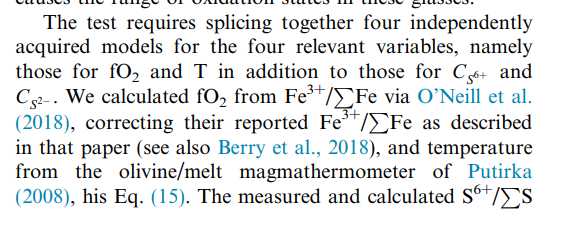

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

## Lets use a specific Fe3Fet_Liq ratio
- in the supporting spreadsheet of OM2022, there are 2 choices. The first is whether you want to use temperature you have entered, or use an olivine/melt temeprature
- For oxygen fugacity, you also have the choice of using Fe3FeT, or entering a fo2 value in log-bar units
 - Here, we use an input temperature, and a Fe3FeT ratio to start with 

In [2]:

Liqs_KnowFe_KnownT=pd.read_excel('ONeill_Mav_2022_calculator.xlsx',
                    sheet_name="PySulfSat_Input_knownFe")

In [3]:
calc_GivenFe3=ss.calculate_OM2022_S6St(df=Liqs_KnowFe_KnownT, T_K=Liqs_KnowFe_KnownT['T(K)'],  
                    Fe3Fet_Liq=Liqs_KnowFe_KnownT['Fe3+/∑Fe'])

calc_GivenFe3.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,Sample ID,T ºC,Fe3+/∑Fe,log fO2,Unnamed: 4,Unnamed: 5,Na2O_Liq,MgO_Liq,Al2O3_Liq,SiO2_Liq,K2O_Liq,CaO_Liq,TiO2_Liq,MnO_Liq,FeOt_Liq,T ºC.1,T(K),∆QFM,∆QFM.1,logfO2,ln(CS6+) calc.,lnK(SO3/S2),LN(S6+/S2-),S6+/∑S,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_Fe3,Mg_Number_Liq_NoFe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.009061,-2.252326,13.642821,-18.676809,-4.694696,0.385382,VG175,NaN,0.112135,NaN,1763.200000,NaN,2.63,5.88,13.36,50.93,0.17,10.81,2.46,0.247148,14.21,1159.231029,1432.231029,0.385420,2.910195,-6.0,13.640014,-18.672787,-4.693951,0.009067,0.531893,0.091545,0.002186,0.124108,0.120962,0.082221,0.026627,0.001132,0.019325,0.0,0.479191,0.082475,0.001970,0.111811,0.108977,0.148149,0.047978,0.002041,0.017410,0.0,0.424494,0.424494,-8.526645,0.099273
1,0.018402,-2.187329,13.756697,-18.757549,-3.976697,0.549923,180,NaN,0.123145,NaN,1889.000000,NaN,2.80,5.63,13.31,50.01,0.26,10.50,2.74,0.241481,14.67,1156.226447,1429.226447,0.549962,2.846964,-6.1,13.753886,-18.753510,-3.975942,0.018416,0.526916,0.088430,0.002155,0.129262,0.118535,0.082640,0.028600,0.001747,0.021715,0.0,0.473425,0.079453,0.001936,0.116140,0.106502,0.148501,0.051392,0.003140,0.019511,0.0,0.406209,0.406209,-8.398880,0.101838
2,0.016171,-2.276202,13.702023,-18.567275,-4.108246,0.468580,183,NaN,0.119464,NaN,1732.000000,NaN,2.72,6.12,13.62,50.18,0.16,11.06,2.28,0.221798,13.51,1163.327494,1436.327494,0.468617,2.660312,-6.2,13.699209,-18.563276,-4.107531,0.016182,0.527545,0.095915,0.001975,0.118779,0.124583,0.084379,0.027721,0.001073,0.018030,0.0,0.473911,0.086164,0.001774,0.106703,0.111917,0.151600,0.049806,0.001928,0.016197,0.0,0.446745,0.446745,-8.393554,0.093956
3,0.013897,-2.376010,13.612677,-18.501180,-4.262089,0.417146,186,NaN,0.115794,NaN,1567.500000,NaN,2.62,6.34,13.82,50.55,0.16,11.12,2.11,0.222748,12.80,1165.810839,1438.810839,0.417183,2.530211,-6.3,13.609866,-18.497195,-4.261387,0.013907,0.531087,0.099298,0.001982,0.112463,0.125176,0.085562,0.026685,0.001072,0.016675,0.0,0.477030,0.089191,0.001780,0.101016,0.112435,0.153706,0.047937,0.001926,0.014977,0.0,0.468908,0.468908,-8.414880,0.089319
4,0.051541,-2.345865,13.651403,-18.557150,-2.912471,0.721690,187,NaN,0.135495,NaN,1654.833333,NaN,2.69,6.21,13.48,50.17,0.18,10.96,2.33,0.228507,12.99,1163.707357,1436.707357,0.721727,2.455701,-6.4,13.648592,-18.553153,-2.911760,0.051575,0.530078,0.097813,0.002045,0.114779,0.124074,0.083929,0.027553,0.001213,0.018517,0.0,0.476391,0.087906,0.001838,0.103154,0.111507,0.150857,0.049524,0.002180,0.016642,0.0,0.460089,0.460089,-8.135831,0.089177


### Comparing calculations of Ln(CS6-) from their spreadsheet with PySulfSat

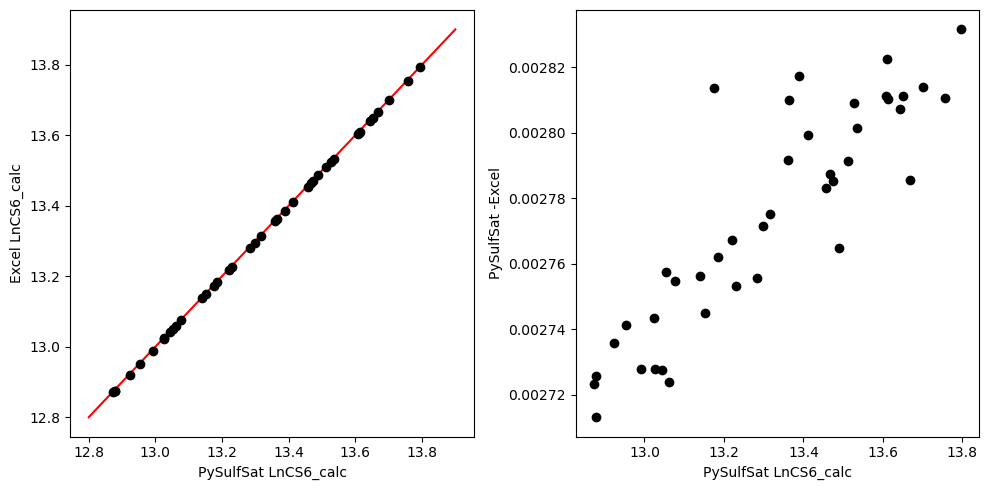

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([12.8, 13.9], [12.8, 13.9], '-r')
ax1.plot(calc_GivenFe3['LnCS6_calc'], Liqs_KnowFe_KnownT['ln(CS6+) calc.'], 'ok')
ax1.set_xlabel('PySulfSat LnCS6_calc')
ax1.set_ylabel('Excel LnCS6_calc')

ax2.plot(calc_GivenFe3['LnCS6_calc'], 
calc_GivenFe3['LnCS6_calc']-Liqs_KnowFe_KnownT['ln(CS6+) calc.'], 'ok')
ax2.set_xlabel('PySulfSat LnCS6_calc')
ax2.set_ylabel('PySulfSat -Excel')
fig.tight_layout()


### Comparing calculations of S6St from their spreadsheet with PySulfSat.

Text(0, 0.5, 'PySulfSat S6St_Liq-Excel S6St_Liq (ppm)')

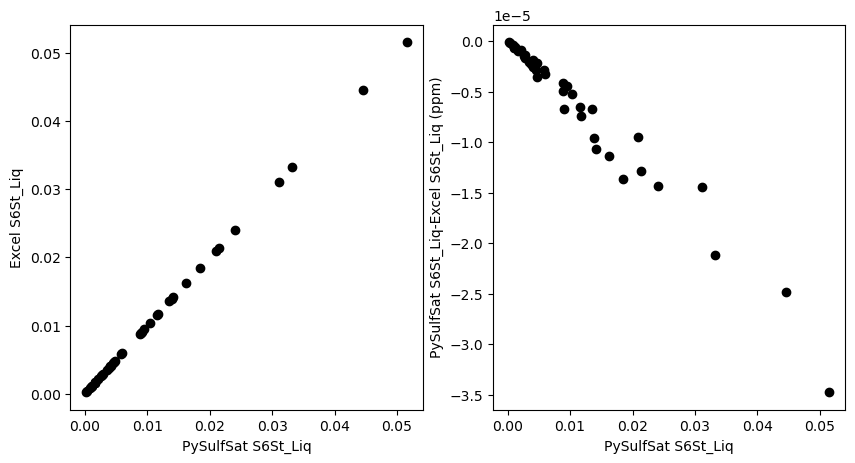

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(calc_GivenFe3['S6St_Liq'], Liqs_KnowFe_KnownT['S6+/∑S'], 'ok')
ax1.set_xlabel('PySulfSat S6St_Liq')
ax1.set_ylabel('Excel S6St_Liq')

ax2.plot(calc_GivenFe3['S6St_Liq'], 
calc_GivenFe3['S6St_Liq']-Liqs_KnowFe_KnownT['S6+/∑S'], 'ok')
ax2.set_xlabel('PySulfSat S6St_Liq')
ax2.set_ylabel('PySulfSat S6St_Liq-Excel S6St_Liq (ppm)')

## Using a givenlogfo2 value

In [11]:
#Liqs=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")
Liqs_Knowfo2=pd.read_excel('ONeill_Mav_2022_calculator.xlsx', sheet_name="knownfo2")

In [13]:
calc_Knowfo2=ss.calculate_OM2022_S6St(df=Liqs_Knowfo2, T_K=Liqs_Knowfo2['T(K)'],  
                   logfo2=Liqs_Knowfo2['log fO2'])

calc_Knowfo2.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,Sample ID,T ºC,Fe3+/∑Fe,log fO2,Unnamed: 4,Unnamed: 5,Na2O_Liq,MgO_Liq,Al2O3_Liq,SiO2_Liq,K2O_Liq,CaO_Liq,TiO2_Liq,MnO_Liq,FeOt_Liq,T ºC.1,T(K),∆QFM,logfO2,ln(CS2-) calc.,ln(CS6+) calc.,lnK(SO3/S2),LN(S6+/S2-),S6+/∑S,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_Fe3,Mg_Number_Liq_NoFe3,Fe2Fet_Liq_calc,Fe2_Liq_cat_frac
0,0.999163,-2.252326,13.787255,-18.676809,7.085368,-14.912027,VG175,NaN,NaN,-6.0,1763.200000,NaN,2.63,5.88,13.36,50.93,0.17,10.81,2.46,0.247148,14.21,1159.231029,1432.231029,0.385420,-8.524775,-2.251286,13.332659,-18.672787,6.625711,0.998676,0.531893,0.091545,0.002186,0.124108,0.120962,0.082221,0.026627,0.001132,0.019325,0.0,0.479191,0.082475,0.001970,0.111811,0.108977,0.148149,0.047978,0.002041,0.017410,0.0,0.424494,0.424494,0.999981,0.111809
1,0.998859,-2.187329,13.921803,-18.757549,6.775143,-15.048803,180,NaN,NaN,-6.1,1889.000000,NaN,2.80,5.63,13.31,50.01,0.26,10.50,2.74,0.241481,14.67,1156.226447,1429.226447,0.549962,-8.397002,-2.186285,13.456322,-18.753510,6.304579,0.998175,0.526916,0.088430,0.002155,0.129262,0.118535,0.082640,0.028600,0.001747,0.021715,0.0,0.473425,0.079453,0.001936,0.116140,0.106502,0.148501,0.051392,0.003140,0.019511,0.0,0.406209,0.406209,0.999982,0.116138
2,0.997849,-2.276202,13.848451,-18.567275,6.139873,-15.062134,183,NaN,NaN,-6.2,1732.000000,NaN,2.72,6.12,13.62,50.18,0.16,11.06,2.28,0.221798,13.51,1163.327494,1436.327494,0.468617,-8.391695,-2.275169,13.448619,-18.563276,5.735009,0.996780,0.527545,0.095915,0.001975,0.118779,0.124583,0.084379,0.027721,0.001073,0.018030,0.0,0.473911,0.086164,0.001774,0.106703,0.111917,0.151600,0.049806,0.001928,0.016197,0.0,0.446745,0.446745,0.999982,0.106701
3,0.996357,-2.376010,13.746811,-18.501180,5.611429,-15.132026,186,NaN,NaN,-6.3,1567.500000,NaN,2.62,6.34,13.82,50.55,0.16,11.12,2.11,0.222748,12.80,1165.810839,1438.810839,0.417183,-8.413028,-2.374978,13.388951,-18.497195,5.248552,0.994772,0.531087,0.099298,0.001982,0.112463,0.125176,0.085562,0.026685,0.001072,0.016675,0.0,0.477030,0.089191,0.001780,0.101016,0.112435,0.153706,0.047937,0.001926,0.014977,0.0,0.468908,0.468908,0.999983,0.101014
4,0.994737,-2.345865,13.811919,-18.557150,5.241845,-15.257522,187,NaN,NaN,-6.4,1654.833333,NaN,2.69,6.21,13.48,50.17,0.18,10.96,2.33,0.228507,12.99,1163.707357,1436.707357,0.721727,-8.133974,-2.344830,13.455643,-18.553153,4.880537,0.992464,0.530078,0.097813,0.002045,0.114779,0.124074,0.083929,0.027553,0.001213,0.018517,0.0,0.476391,0.087906,0.001838,0.103154,0.111507,0.150857,0.049524,0.002180,0.016642,0.0,0.460089,0.460089,0.999984,0.103152


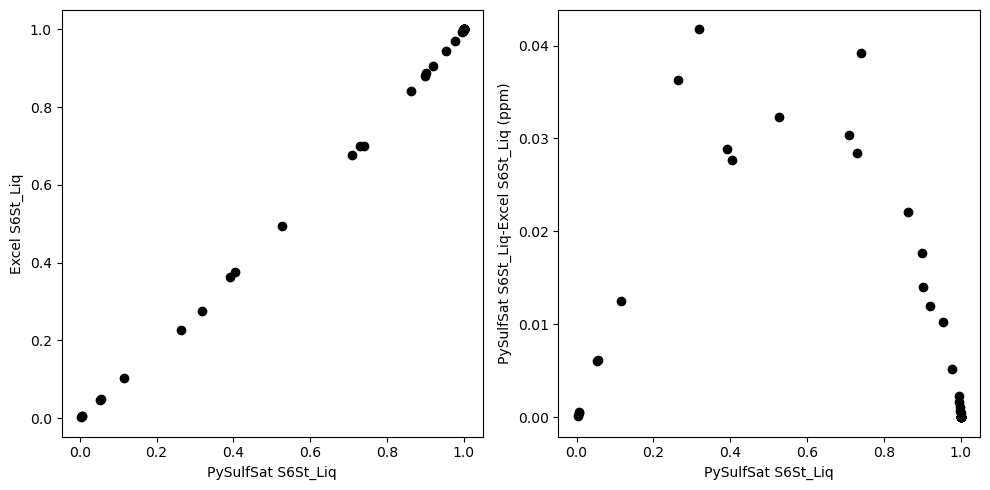

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(calc_Knowfo2['S6St_Liq'], calc_Knowfo2['S6+/∑S'], 'ok')
ax1.set_xlabel('PySulfSat S6St_Liq')
ax1.set_ylabel('Excel S6St_Liq')

ax2.plot(calc_Knowfo2['S6St_Liq'], calc_Knowfo2['S6St_Liq']-calc_Knowfo2['S6+/∑S'], 'ok')
ax2.set_xlabel('PySulfSat S6St_Liq')
ax2.set_ylabel('PySulfSat S6St_Liq-Excel S6St_Liq (ppm)')
fig.tight_layout()